## Introduction to DataBase System

데이터베이스(Database)는 데이터를 체계적으로 저장하고 관리하는 시스템이다. 데이터를 구조화된 형태로 저장하여 효율적인 검색, 수정, 삭제가 가능하도록 돕는다. 데이터베이스는 크게 엑셀처럼 행과 열로 관리되는 관계형 데이터베이스(RDBMS)와 키와 밸류 형태로 관리되는 NoSQL 데이터베이스로 이뤄진다. 

그중 관계형 데이터베이스는 데이터를 테이블 형태로 저장하며, 각 테이블은 행(Row)과 열(Column)로 구성된다. 데이터베이스는 대량의 데이터를 안정적으로 관리하고, 여러 사용자와 애플리케이션이 동시에 데이터를 활용할 수 있게 한다. 관계형 데이터베이스는 특히 금융 데이터를 다루는 데 있어서 알맞은 형태로, 시계열 및 고객 데이터와 거래 기록들을 다루는 데 있어서 알맞게 사용가능하다. 최근에는 High Frequency 데이터 처리 및 market depth, order book 데이터 관리의 중요성이 대두되면서, NoSQL형 데이터도 증가하는 추세에 있다.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import sqlite3

TICKERS = ['^SPX','^IXIC','^RUT','^DJI','^XAX']
START_DATE = '1990-01-01'

### 1. Structured Query Language

`SQL(Structured Query Language)`은 관계형 데이터베이스를 관리하기 위한 표준 언어이다. 1970년대 IBM에서 SEQUEL이라는 이름으로 처음 개발되었으며, 이후 ANSI와 ISO에 의해 표준화되었다. SQL은 관계형 데이터베이스에서 데이터를 표 형식으로 다루며, 데이터 간의 관계를 정의하고 관리하는 데 적합하다. 

SQL은 데이터 정의, 조작, 제어라는 세 가지 주요 기능으로 나뉘는데, **데이터 정의** 는 테이블과 같은 데이터베이스 구조를 생성, 수정, 삭제하는 작업으로, 주로 데이터베이스 설계 초기 단계에서 사용된다. **데이터 조작** 은 삽입, 조회, 수정, 삭제와 같은 데이터를 직접 다루는 작업으로, 데이터베이스의 일상적인 사용에서 가장 많이 쓰인다. **데이터 제어** 는 사용자 권한을 관리하고 데이터베이스의 보안을 설정하는 데 초점이 맞춰져 있다. 이러한 기능은 데이터베이스의 설계부터 운영까지 모든 단계에서 필수적이다. 예를 들어, 새로운 테이블을 생성하고 데이터를 삽입한 뒤, 특정 사용자에게만 접근 권한을 부여하는 방식으로 활용될 수 있다. SQL의 각 기능은 효율적인 데이터 관리를 가능하게 하며, 데이터 무결성과 보안을 보장한다.

SQL은 데이터를 정의하는 DDL(Data Definition Language), 데이터를 조작하는 DML(Data Manipulation Language), 데이터를 제어하는 DCL(Data Control Language)로 구성되어 있다. 이 세 가지 기능은 데이터베이스의 구조 설계, 데이터 처리, 보안 관리의 모든 단계를 포함한다. 

현재 MySQL, PostgreSQL, SQLite와 같은 많은 데이터베이스 시스템이 SQL을 지원하며, 효율적이고 안정적인 데이터 관리를 가능하게 한다.

#### 1.1 DDL (Data Definition Language)

테이블과 관련 열을 생성, 변경, 삭제하는 명령어를 데이터 정의어라고 한다. DDL은 데이터베이스의 구조를 정의하고 관리하는 데 사용된다. 테이블, 인덱스, 뷰 등의 데이터베이스 객체를 생성, 수정, 삭제하는 명령어를 포함한다. 대표적인 명령어로는 `CREATE`, `ALTER`, `DROP` 등이 있다. 

예를 들어, `CREATE TABLE` 명령어를 사용해 새로운 테이블을 정의할 수 있다. 또한, `ALTER TABLE`을 사용해 기존 테이블에 새로운 열을 추가하거나 수정할 수 있다. 

DDL은 데이터베이스의 설계 초기 단계에서 중요하며, 데이터의 논리적 구조를 설정하는 역할을 한다. 데이터 타입과 제약 조건을 설정함으로써 데이터의 일관성과 무결성을 보장할 수 있다. 금융 데이터베이스에서는 주식 가격, 거래 기록, 경제 지표 등을 저장하는 테이블을 설계하는 데 자주 사용된다. 스키마 설계와 데이터 정의는 데이터베이스 성능과 데이터 분석의 정확성에 큰 영향을 미친다.

**Create Table**

가장 기초적인 작업은 테이블을 생성하는 것이다. 테이블은 하나의 엑셀 데이터를 생성하는 것과 같다고 보면 된다. 한 종목의 시계열 데이터는 대략 7개의 컬럼(날짜, 시가, 고가, 저가, 종가, 수정종가, 거래량)을 가진 table을 생성한다고 보면 편하다. DB데이터는 `sqlite3` 라이브러리의 `connect()` 함수를 통해 연결을 우선적으로 해 줘야 한다. `cursur()` method는 파이썬 내에서 SQL 명령문을 실행하도록 해 주는 역할을 한다.

In [2]:
DB_PATH = 'price.db' # 경로 (디렉토리 내에 생성)
conn = sqlite3.connect(DB_PATH) # DB에 연결
cursor = conn.cursor() # 데이터베이스에 접근해서, SQL문을 실행가능한 상태로 변경

In [3]:
type(conn) # Connection 

sqlite3.Connection

price.db에 `stock_prices`이라는 table을 생성해 보자

In [4]:
cursor.execute(
    f"""
        CREATE table if not exists stock_prices (
            price varchar(10),
            ticker varchar(10),
            value real, 
            primary key (price, ticker)
        )
    """
)

DB에 접속하면 실제로 stock_prices이라는 이름의 table이 생성되는 것을 확인할 수 있다. 여기서 SQL문의 `primary_key`는 테이블에서 각 행을 유일하게 식별하는 컬럼으로, 데이터를 불러서 읽을 때 좀 더 빠르게 읽을 수 있도록 한다. 테이블과 열의 이름을 정할 때에는 다음 규칙을 따라야 한다.

- 동일 한 사용자가 동일한 이름의 테이블을 중복하여 생성이 불가능하다. 또한, 테이블 안의 열 이름도 동일한 이름으로 생성 불가능하다.
- `SELECT`, `FROM`, `COUNT`와 같은 예약어는 사용할 수 없다.
- 테이블 이름은 문자로 시작해야 한다. 이 규칙은 python의 변수 사용 규칙과 같다. 한글과 특문을 사용할 수는 있지만 권장되지 않는다.
- 문자의 길이는 1~30 byte 이내여야 한다.

**Modify Tables**

기존에 존재하는 테이블에 컬럼을 추가하여 저장하거나, 기존의 컬럼의 내용을 수정하고 싶을 수 있다. `ALTER` 명령문은 SQL에서 테이블 또는 데이터베이스 객체의 구조를 변경할 때 사용된다. 테이블에 새로운 열(Column)을 추가하거나 기존 열을 수정 또는 삭제하는 등의 작업을 수행할 수 있다. 또한, 제약 조건(Constraints) 추가, 데이터 타입 변경 등도 가능하다.

이미 생성한 테이블에 맨 끝쪽에 returns를 추가한다고 상상해 보자. 아래와 같이 SQL문을 작성할 수 있다.

In [5]:
cursor.execute(
    f"""
        ALTER TABLE stock_prices
        add returns real
    """
)

또는, 이미 추가된 컬럼을 삭제할 수도 있다.

In [6]:
cursor.execute(
    f"""
        ALTER TABLE stock_prices
        drop column returns;
    """
)

`ALTER TABLE ~ ADD`절의 특징은 다음과 같다.

- 새로운 열을 추가할 수 있지만, 테이블에 있던 기존의 열은 삭제할 수 없다.
- 새로 생성되는 열은 위치를 지정할 수 없다
- 테이블에 이미 행이 있다면 열을 추가하였을 때 새로운 열의 데이터 값을 `NULL`로 초기화된다.

`ALTER TABLE ~ MODIFY`절을 사용하여 열의 정의를 수정할 수 있다. 열의 수정 대상은 열의 데이터 타입과 크기, Default Value이다. 단, 여기서는 SQLlite3을 사용하기 때문에, Modify는 지원되지 않는다.

`ALTER TABLE ~ RENAME COLUMN` 절을 사용하면 열 이름을 수정할 수 있다.

In [7]:
cursor.execute(
    f"""
        ALTER TABLE stock_prices
        add returns real
    """
)

In [8]:
cursor.execute(
    f"""
        alter table stock_prices
        rename column returns to return;
    """
)

**Delete table**

table을 생성한 후 더이상 사용하지 않거나 쓸모 없다고 판단되는 경우 table 자체를 삭제할 수도 있다. `DROP` 명령문은 데이터베이스에서 특정 테이블을 완전히 삭제하는 데 사용된다. 이 명령어를 실행하면 테이블의 구조와 모든 데이터가 완전히 제거되며, 복구할 수 없다. 삭제된 테이블과 관련된 모든 인덱스, 제약 조건, 그리고 해당 테이블에 저장된 데이터도 함께 삭제된다.

In [9]:
cursor.execute(
    f"""
        DROP table stock_prices
    """
)

이제 실제로 테이블을 생성해 보자. 

In [10]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS stock_prices (
        date DATE NOT NULL,
        field VARCHAR(10) NOT NULL,
        ticker VARCHAR(10) NOT NULL,
        value REAL NOT NULL,
        PRIMARY KEY (date, field, ticker)
    )
""")

#### 1.2 DML (Data Manipulation Language)

테이블을 생성하였으니, 알맞은 데이터를 적재할 차례이다. DML은 데이터베이스에 저장된 데이터를 조회하거나 수정, 삽입, 삭제하는 작업을 수행한다. **가장 자주 사용되는 SQL 기능**으로, 데이터를 직접 다루기 때문에 **실시간 데이터 분석과 관리에서 중요**하다. 

대표적인 명령어로는 데이터를 삽입하는 `INSERT`, 데이터를 검색하는 `SELECT`, 데이터를 수정하는 `UPDATE`, 데이터를 삭제하는 `DELETE`가 있다. 예를 들어, `SELECT` 명령어를 사용해 특정 주식의 일별 가격을 조회할 수 있다. 혹은, 전체 가격 테이블에서 특정 종목의 가격 전체의 열을 불러올 수도 있다.

주로 데이터의 상태를 변경하거나 원하는 데이터를 추출하는 데 사용되며, 데이터베이스 사용자의 주요 인터페이스 역할을 한다. 금융 데이터에서는 특정 날짜의 주식 가격을 조회하거나, 거래 내역을 삽입하고 수정하는 데 활용된다. DML은 데이터를 효율적으로 다룰 수 있도록 설계되어 있어, 대규모 데이터베이스에서도 빠르고 정확하게 작동한다.

In [11]:
data = yf.download(TICKERS, start = START_DATE, progress = False)

In [14]:
data['Adj Close']

Ticker,^DJI,^IXIC,^RUT,^SPX,^XAX
Date,,,,,
1990-01-02,NaN,459.299988,169.949997,359.690002,NaN
1990-01-03,NaN,460.899994,170.789993,358.760010,NaN
1990-01-04,NaN,459.399994,170.089996,355.670013,NaN
1990-01-05,NaN,458.200012,169.649994,352.200012,NaN
1990-01-08,NaN,458.700012,169.550003,353.790009,NaN
...,...,...,...,...,...
2025-02-10,44470.410156,19714.269531,2287.939941,6066.439941,5079.399902
2025-02-11,44593.648438,19643.859375,2275.699951,6068.500000,5133.839844
2025-02-12,44368.558594,19649.949219,2255.889893,6051.970215,5145.459961


yahoo finance를 비롯하여 대부분의 가격을 다루는 DataBase는 다음과 같이 MultiIndex 형태로 스키마를 관리한다.

In [12]:
data.columns

MultiIndex([('Adj Close',  '^DJI'),
            ('Adj Close', '^IXIC'),
            ('Adj Close',  '^RUT'),
            ('Adj Close',  '^SPX'),
            ('Adj Close',  '^XAX'),
            (    'Close',  '^DJI'),
            (    'Close', '^IXIC'),
            (    'Close',  '^RUT'),
            (    'Close',  '^SPX'),
            (    'Close',  '^XAX'),
            (     'High',  '^DJI'),
            (     'High', '^IXIC'),
            (     'High',  '^RUT'),
            (     'High',  '^SPX'),
            (     'High',  '^XAX'),
            (      'Low',  '^DJI'),
            (      'Low', '^IXIC'),
            (      'Low',  '^RUT'),
            (      'Low',  '^SPX'),
            (      'Low',  '^XAX'),
            (     'Open',  '^DJI'),
            (     'Open', '^IXIC'),
            (     'Open',  '^RUT'),
            (     'Open',  '^SPX'),
            (     'Open',  '^XAX'),
            (   'Volume',  '^DJI'),
            (   'Volume', '^IXIC'),
            (   'Volume',  '

SQL의 `INSERT`를 활용해 개별적으로 데이터를 적재할 수 있다. 이러는 경우, 모든 데이터에 대해서 하나하나 데이터를 적재하면 된다

In [15]:
data = data.stack(level=1).reset_index()

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_12290/4055030117.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data = data.stack(level=1).reset_index()


In [16]:
data

Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,1990-01-02,^IXIC,459.299988,459.299988,459.299988,452.700012,452.899994,1.107200e+08
1,1990-01-02,^RUT,169.949997,169.949997,169.960007,168.220001,168.309998,1.620700e+08
2,1990-01-02,^SPX,359.690002,359.690002,359.690002,351.980011,353.399994,1.620700e+08
3,1990-01-03,^IXIC,460.899994,460.899994,461.600006,460.000000,461.100006,1.526600e+08
4,1990-01-03,^RUT,170.789993,170.789993,170.800003,169.960007,169.960007,1.923300e+08
...,...,...,...,...,...,...,...,...
42210,2025-02-14,^DJI,44546.078125,44546.078125,44769.050781,44498.960938,44720.988281,4.745700e+08
42211,2025-02-14,^IXIC,20026.769531,20026.769531,20045.759766,19932.150391,19956.820312,7.995720e+09
42212,2025-02-14,^RUT,2279.979980,2279.979980,2297.709961,2276.629883,2287.850098,4.335190e+09
42213,2025-02-14,^SPX,6114.629883,6114.629883,6127.470215,6107.620117,6115.520020,4.335190e+09


In [17]:
data = data[['Date','Ticker','Open','High','Low','Close','Adj Close','Volume']]

In [18]:
data

Price,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,^IXIC,452.899994,459.299988,452.700012,459.299988,459.299988,1.107200e+08
1,1990-01-02,^RUT,168.309998,169.960007,168.220001,169.949997,169.949997,1.620700e+08
2,1990-01-02,^SPX,353.399994,359.690002,351.980011,359.690002,359.690002,1.620700e+08
3,1990-01-03,^IXIC,461.100006,461.600006,460.000000,460.899994,460.899994,1.526600e+08
4,1990-01-03,^RUT,169.960007,170.800003,169.960007,170.789993,170.789993,1.923300e+08
...,...,...,...,...,...,...,...,...
42210,2025-02-14,^DJI,44720.988281,44769.050781,44498.960938,44546.078125,44546.078125,4.745700e+08
42211,2025-02-14,^IXIC,19956.820312,20045.759766,19932.150391,20026.769531,20026.769531,7.995720e+09
42212,2025-02-14,^RUT,2287.850098,2297.709961,2276.629883,2279.979980,2279.979980,4.335190e+09
42213,2025-02-14,^SPX,6115.520020,6127.470215,6107.620117,6114.629883,6114.629883,4.335190e+09


In [20]:
data.columns = ['date', 'ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [22]:
data['date']

0       1990-01-02
1       1990-01-02
2       1990-01-02
3       1990-01-03
4       1990-01-03
           ...    
42210   2025-02-14
42211   2025-02-14
42212   2025-02-14
42213   2025-02-14
42214   2025-02-14
Name: date, Length: 42215, dtype: datetime64[ns]

In [23]:
data['date'] = data['date'].astype(str) # sql lite는 datetime 형태의 타입이 지원되지 않으므로, str형태로 변환

In [24]:
records = []
for _, row in data.iterrows():
    for field in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
        records.append((row['date'], field, row['ticker'], row[field]))

In [25]:
records

[('1990-01-02', 'Open', '^IXIC', 452.8999938964844),
 ('1990-01-02', 'High', '^IXIC', 459.29998779296875),
 ('1990-01-02', 'Low', '^IXIC', 452.70001220703125),
 ('1990-01-02', 'Close', '^IXIC', 459.29998779296875),
 ('1990-01-02', 'Adj Close', '^IXIC', 459.29998779296875),
 ('1990-01-02', 'Volume', '^IXIC', 110720000.0),
 ('1990-01-02', 'Open', '^RUT', 168.30999755859375),
 ('1990-01-02', 'High', '^RUT', 169.9600067138672),
 ('1990-01-02', 'Low', '^RUT', 168.22000122070312),
 ('1990-01-02', 'Close', '^RUT', 169.9499969482422),
 ('1990-01-02', 'Adj Close', '^RUT', 169.9499969482422),
 ('1990-01-02', 'Volume', '^RUT', 162070000.0),
 ('1990-01-02', 'Open', '^SPX', 353.3999938964844),
 ('1990-01-02', 'High', '^SPX', 359.69000244140625),
 ('1990-01-02', 'Low', '^SPX', 351.9800109863281),
 ('1990-01-02', 'Close', '^SPX', 359.69000244140625),
 ('1990-01-02', 'Adj Close', '^SPX', 359.69000244140625),
 ('1990-01-02', 'Volume', '^SPX', 162070000.0),
 ('1990-01-03', 'Open', '^IXIC', 461.100006103

In [26]:
cursor.executemany(
    "insert or ignore into stock_prices (date, field, ticker, value) values (?, ?, ?, ?)", 
    records
)

In [27]:
conn.commit() # commit 실행

In [28]:
conn

In [29]:
df = pd.read_sql("SELECT * FROM stock_prices LIMIT 10", conn) # 저장된 데이터를 확인
print(df)

         date      field ticker         value
0  1990-01-02       Open  ^IXIC  4.529000e+02
1  1990-01-02       High  ^IXIC  4.593000e+02
2  1990-01-02        Low  ^IXIC  4.527000e+02
3  1990-01-02      Close  ^IXIC  4.593000e+02
4  1990-01-02  Adj Close  ^IXIC  4.593000e+02
5  1990-01-02     Volume  ^IXIC  1.107200e+08
6  1990-01-02       Open   ^RUT  1.683100e+02
7  1990-01-02       High   ^RUT  1.699600e+02
8  1990-01-02        Low   ^RUT  1.682200e+02
9  1990-01-02      Close   ^RUT  1.699500e+02


In [30]:
conn.close() # 데이터 연결 종료

#### 1.3 DCL (Data Control Language)

DCL은 데이터베이스에 대한 접근 권한을 관리하고 보안을 유지하는 데 사용된다. 대표적인 명령어로는 권한을 부여하는 `GRANT`와 권한을 회수하는 `REVOKE`가 있다. 예를 들어, 특정 사용자에게 주식 데이터베이스의 읽기 권한만 부여하거나, 수정 권한을 제한할 수 있다. 

DCL은 데이터베이스의 무단 접근을 방지하고, 데이터의 기밀성을 보장하는 데 중요한 역할을 한다. 금융 데이터베이스에서는 민감한 데이터에 대한 접근을 통제해 데이터 유출이나 보안 사고를 예방할 수 있다. 또한, 데이터베이스 관리자는 사용자의 역할(Role)을 설정하고, 각 역할에 적합한 권한을 할당할 수 있다. 따라서 DCL은 데이터 무결성과 신뢰성을 유지하는 데 필수적이다. 데이터 보호가 중요한 환경에서는 DCL 명령어를 활용한 권한 관리를 정기적으로 점검해야 한다.

여기서는 데이터 적재 및 관리와 거리가 멀기 때문에 따로 다루지는 않도록 한다.

### 2. Rules of Data Management

Data Base에서 무결성과 제약 조건은 반드시 지켜져야 하는 약속이다. 무결성과 제약 조건은 무엇인지 알아보자.

#### 2.1 Data Integrity

데이터베이스에 저장된 데이터 값과 사용자가 의도한 데이터 값은 일치헤야 한다. 또한, 데이터는 정확성, 유효성, 일관성, 신뢰성이 지켜져야 하며, 이를 어기는 잘못된 입력과 갱신 또는 삭제로부터 보호되어야 한다. 예를 들어, 특정 종목의 코드 또는 Ticker는 식별자이기 때문에 identification과 같으므로 유일한 값이어야 한다. 그러나, key 값에 중복 값이 입력되거나 `NULL`값이 입력된다면 데이터 식별에 큰 문제가 생길 수 있다. 둘째로, 숫자로 이뤄진 컬럼에 'two'와 같은 문자열이 들어가는 경우 이 값을 숫자로 인정해야 할지 말아야 할지 어렵게 된다.

이처럼, 데이터베이스의 관리 규칙이 지켜지지 않으면 데이터베이스 시스템을 운영하는 데 큰 혼란이 올 수 있다. 데이터베이스의 데이터는 사용자의 목적에 맞게 입력되고 저장되어야 하며, **규칙을 위반하지 말아야** 한다. 이를 위해 DB system은 데이터에 접근하거나 데이터를 처리할 때마다 부적절한 데이터가 입력되는지 검사하여 데이터가 결점이 없는 것을 검사한다. 이 기본 규칙을 Data Integrity라고 한다.

|유형| 설명                                                                                                                                       |
|:---:|:-----------------------------------------------------------------------------------------------------------------------------------------|
|Entity Integrity| primary key로 선택된 열은 고유해야 하며, NULL값을 가질 수 없다.                                                                                             |
|Reference Integrity| primary key와 foreign key의 관계이다. <br> 외래 키가 있는 테이블의 경우, 기본 키와 외래 키 간의 관계가 항상 유지됨을 보장한다. <br> 참조하는 외래 키가 존재하면 행은 삭제될 수 없고, 기본 키도 변경될 수 없다. |
|Domain Integrity| 데이터 형태, 범위, 기본값, 유일성에 관한 제한이다. <br> 주어진 속성 값은 그 속성이 정의된 도메인에 속한 값이어야 한다.                                                                 |
|Business Integrity| 사용자의 업무 규칙에 따른 비즈니스적인 제약 조건이다                                                                                                            |

#### 2.2 Constraint 

제약 조건이란, 정해 놓은 규칙에 맞는 데이터만 입력받고 규칙에 어긋나는 데이터는 거부하여 데이터 무결성을 지키는 방법이다. 대표적인 제약 조건의 종류는 다음과 같다.

##### 1. Primary Key Constraint

`UNIQUE` + `NOT NULL`을 만족해야 한다. 또한, 테이블을 대표하여 각 행을 유일하게 식별하는 값이어야 한다.

In [31]:
conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()

In [32]:
cursor.execute("PRAGMA table_info(stock_prices);") # table 내의 primary key 가져오기
columns = cursor.fetchall()

In [33]:
columns

[(0, 'date', 'DATE', 1, None, 1),
 (1, 'field', 'VARCHAR(10)', 1, None, 2),
 (2, 'ticker', 'VARCHAR(10)', 1, None, 3),
 (3, 'value', 'REAL', 1, None, 0)]

##### 2. Foreign Key Constraint

열 값이 부모 테이블의 참조 열을 반드시 참조해야 한다. 참조되는 열은 `UNIQUE`하거나 `PRIMARY KEY`이다

In [34]:
cursor.execute(
    """
    create table if not exists ticker_info (
        number integer primary key autoincrement,
        ticker varchar(10) not null
    )
    """
)

In [35]:
TICKERS

['^SPX', '^IXIC', '^RUT', '^DJI', '^XAX']

In [36]:
cursor.executemany(
    "insert or ignore into ticker_info (ticker) values (?)", 
    [(ticker,) for ticker in TICKERS]
)
conn.commit()

In [37]:
cursor.execute("SELECT * FROM ticker_info;")
print(cursor.fetchall())

[(1, '^SPX'), (2, '^IXIC'), (3, '^RUT'), (4, '^DJI'), (5, '^XAX')]


In [38]:
cursor.execute("SELECT * FROM ticker_info;")
ticker_info = cursor.fetchall()

In [39]:
ticker_info

[(1, '^SPX'), (2, '^IXIC'), (3, '^RUT'), (4, '^DJI'), (5, '^XAX')]

`join` keyword를 사용하면 ticker info로부터 저장된 티커를 참조하여 stock prices의 value를 가져올 수 있다.

In [44]:
cursor.execute(
    """
    select stock_prices.date, stock_prices.field, stock_prices.ticker, stock_prices.value
    from stock_prices
    join ticker_info ON stock_prices.ticker = ticker_info.ticker
    where stock_prices.ticker = '^SPX'
    """
)

In [45]:
df = pd.DataFrame(cursor.fetchall())

<Axes: >

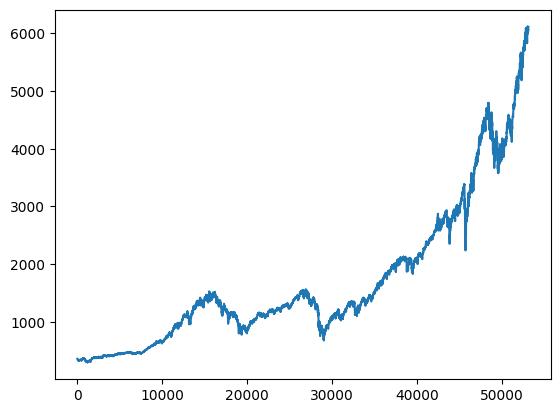

In [52]:
df[df[1] == 'Close'][3].plot()

`where` 조건을 두 개 이상 사용해 특정 티커의 수정 종가만 불러올 수 있다.

In [53]:
cursor.execute(
    """
    select stock_prices.date, stock_prices.field, stock_prices.ticker, stock_prices.value
    from stock_prices
    join ticker_info ON stock_prices.ticker = ticker_info.ticker
    where stock_prices.ticker = '^SPX' and stock_prices.field = 'Adj Close'
    """
)

In [54]:
adj_close = pd.DataFrame(cursor.fetchall())

In [55]:
adj_close.head()

,0,1,2,3
0,1990-01-02,Adj Close,^SPX,359.690002
1,1990-01-03,Adj Close,^SPX,358.760010
2,1990-01-04,Adj Close,^SPX,355.670013
3,1990-01-05,Adj Close,^SPX,352.200012
4,1990-01-08,Adj Close,^SPX,353.790009


<Axes: >

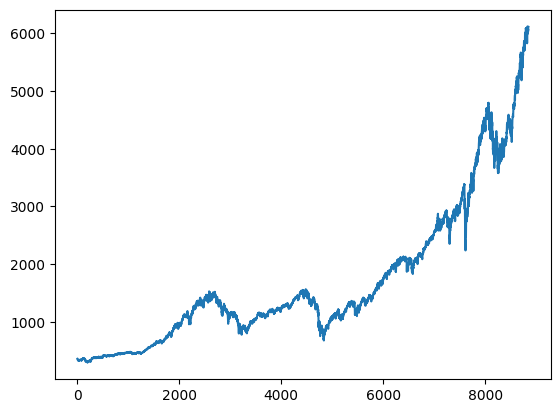

In [56]:
adj_close[3].plot()

##### 3. Unique Key Constraint

중복된 값을 허용하지 않는다. 유일한 값으로 존재해야 한다.

##### 4. Not NULL Constraint

`NULL` 값을 허용하지 않는다. 반드시 값을 입력해야 한다.

In [57]:
cursor.execute(
    """
    SELECT * FROM stock_prices WHERE date = '2025-02-14'
    """
)
cursor.fetchall()

[('2025-02-14', 'Adj Close', '^DJI', 44546.078125),
 ('2025-02-14', 'Adj Close', '^IXIC', 20026.76953125),
 ('2025-02-14', 'Adj Close', '^RUT', 2279.97998046875),
 ('2025-02-14', 'Adj Close', '^SPX', 6114.6298828125),
 ('2025-02-14', 'Adj Close', '^XAX', 5100.7099609375),
 ('2025-02-14', 'Close', '^DJI', 44546.078125),
 ('2025-02-14', 'Close', '^IXIC', 20026.76953125),
 ('2025-02-14', 'Close', '^RUT', 2279.97998046875),
 ('2025-02-14', 'Close', '^SPX', 6114.6298828125),
 ('2025-02-14', 'Close', '^XAX', 5100.7099609375),
 ('2025-02-14', 'High', '^DJI', 44769.05078125),
 ('2025-02-14', 'High', '^IXIC', 20045.759765625),
 ('2025-02-14', 'High', '^RUT', 2297.7099609375),
 ('2025-02-14', 'High', '^SPX', 6127.47021484375),
 ('2025-02-14', 'High', '^XAX', 5204.830078125),
 ('2025-02-14', 'Low', '^DJI', 44498.9609375),
 ('2025-02-14', 'Low', '^IXIC', 19932.150390625),
 ('2025-02-14', 'Low', '^RUT', 2276.6298828125),
 ('2025-02-14', 'Low', '^SPX', 6107.6201171875),
 ('2025-02-14', 'Low', '^XAX'

### 3. Transaction

Transaction이란 데이터베이스의 DML과 값은 논리적인 작업을 의미한다. 실행과 동시성 제어를 위한 중요한 개념이다. 관계형 DB는 데이터를 처리할 때 트랜젝션을 통해 정상 종료나 사용자 프로세스 실패, 시스템 실패와 같은 비정상 종료에 대해 데이터의 신뢰성과 일관성을 보장한다.

일반적으로 DML 실행과 실행에 대한 commit, roll back 단계까지를 트랜젝션이라고 부르지만, 실무에서는 데이터베이스에서 `SELECT`문으로 데이터를 조회하고 DML을 실행하여 종료하는 과정까지를 transaction으로 지칭한다. 정상적인 상황이라면, 마지막 단계에서 commit 혹은 roll back으로 종료된다.

|개념|내용|
|:---|:---|
|Atonomicity|트랜젝션의 처리가 완전히 끝나지 않았을 경우에는 전혀 이뤄지지 않은 것과 같아야 한다.|
|Consistency|트랜젝션의 실행이 성공적으로 완료되면 DB는 모순 없이 일관성이 보존된 상태여야 한다.|
|Isolation|어떤 트랜젝션도 다른 트랜젝션의 부분적 실행 결과를 볼 수 없다|
|Durability|트랜젝션이 성공하면 트랜젝션의 결과를 영구적으로 보장해야 한다|

#### 3.1 Atonomicity

데이터 적재 혹은 삭제와 같은 작업이 완전히 실행되거나 완전히 실패하는 상태 중 하나여야 한다는 의미이다. (All or Nothing). 절반만 삭제되거나 절반만 저장되는 경우는 없다.

#### 3.2 Consistency

트랜젝션이 완료되면 데이터베이스의 데이터는 일관되게 유지되어야 한다. 예를 들어, 한번 적재된 데이터는 별도의 작업을 하기 전까지 수정이 불가능하다.

#### 3.3 Isolation

트랜젝션이 완료되지 않은 동안에는 다른 트랜젝션이 참조하거나 변경할 수 없다. 하나의 작업에서 데이터베이스에 연결한 경우, 다른 작업에서 데이터베이스를 수정하거나 참조할 수 없다. DB는 이러한 고립성을 유지하기 위해, 포트가 여러 군데에서 접근을 시도하는 경우 기본적으로 데이터베이스를 잠군다. (Locking)

#### 3.4 Durability

트랜젝션이 정상적으로 완료되면 해당 데이터는 저장되어 보존되어야 한다. 보존을 보장함으로써 DB 시스템의 신뢰성과 일관성을 유지할 수 있으며, 장애가 발생하였을 때 복구가 가능해진다.

In [72]:
conn.close()